In [841]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


## **Линейная регрессия PyTorch**

In [842]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [843]:
# на выходе вы получите уже сформированный датафрейм
boston_df = pd.read_csv('/content/boston.csv')
# выведем первые пять районов с помощью функции head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [844]:
X = boston_df[['RM', 'LSTAT']]
Y = boston_df['MEDV']

In [845]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3)
# , 
#                                                     random_state = 42)

In [846]:
# размерность обучающей
print(X.shape, Y.shape)

(506, 2) (506,)


In [847]:
import torch

In [848]:
x_tensor = torch.from_numpy(X.values)
y_tensor = torch.from_numpy(Y.values)
x_train_tensor = torch.from_numpy(x_train.values)
y_train_tensor = torch.from_numpy(y_train.values)
x_test_tensor = torch.from_numpy(x_test.values)
y_test_tensor = torch.from_numpy(y_test.values)

In [849]:
import torch
import torch.nn as nn

In [850]:
# Define model
model = nn.Linear(2, 1, dtype=torch.float64)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0003,  0.1001]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.5922], dtype=torch.float64, requires_grad=True)


In [851]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.1001]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.5922], dtype=torch.float64, requires_grad=True)]

In [852]:
# Generate predictions
preds = model(x_train_tensor)
print(preds.reshape(len(y_train_tensor.detach().numpy())))

tensor([1.2809, 2.7243, 2.0107, 1.6444, 2.9163, 1.5452, 1.4352, 2.9715, 2.3521,
        2.0567, 2.0577, 2.9897, 2.0728, 2.3500, 1.9353, 1.2120, 1.8586, 1.9367,
        2.4062, 1.2838, 2.3519, 1.8346, 1.0517, 2.4051, 2.4629, 3.5900, 1.4952,
        2.3190, 1.4683, 1.9527, 2.6262, 2.3081, 1.7944, 2.0007, 0.9222, 2.2430,
        2.1038, 2.0017, 2.0506, 1.0938, 1.6314, 1.9567, 2.3950, 1.5621, 1.5133,
        0.8371, 1.6794, 1.0497, 1.6335, 1.0067, 1.9920, 1.3300, 1.9066, 2.2860,
        1.8646, 2.3110, 2.0937, 1.6543, 1.8515, 3.0004, 1.6493, 2.0705, 1.7196,
        1.3251, 2.8034, 1.4492, 2.5802, 2.6241, 1.2268, 2.2656, 1.5052, 2.9526,
        1.2469, 4.0307, 1.1119, 1.5411, 1.2481, 1.3963, 3.2749, 2.8662, 4.2920,
        1.0356, 1.9747, 1.3351, 1.6024, 2.0588, 1.2630, 1.0636, 1.8715, 1.2640,
        1.4071, 1.3811, 0.9497, 1.3612, 1.8056, 0.9667, 3.2697, 1.7014, 0.8886,
        2.9904, 2.3559, 1.4852, 2.4641, 1.0448, 1.0888, 1.5654, 1.7656, 2.3990,
        1.9906, 1.9356, 1.4703, 1.0579, 

In [853]:
# Import nn.functional
import torch.nn.functional as F

In [854]:
# Define loss function
# loss_fn = F.mse_loss
loss_fn = nn.MSELoss()
print(x_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([354, 2])
torch.Size([354])


In [855]:
# loss = loss_fn(model(x_tensor).reshape(506), y_tensor)
loss = loss_fn(model(x_train_tensor).reshape(
    len(y_train_tensor.detach().numpy())), y_train_tensor)
print(loss)

tensor(526.1404, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [856]:
# Define optimizer
# opt = torch.optim.SGD(model.parameters(), lr=1e-5)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
# opt = torch.optim.RAdam(model.parameters(), lr=0.001)
# opt = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [857]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
            
        # 1. Generate predictions
        pred = model(x_train_tensor)
        
        # 2. Calculate loss
        loss = loss_fn(pred.reshape(len(y_train_tensor.detach().numpy())), 
                       y_train_tensor)
        
        # 3. Compute gradients
        loss.backward()
        
        # 4. Update parameters using gradients
        opt.step()
        
        # 5. Reset the gradients to zero
        opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 1000 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, 
                                                       loss.item()))

In [858]:
model.train()
fit(20000, model, loss_fn, opt)

Epoch [1000/20000], Loss: 228.9992
Epoch [2000/20000], Loss: 165.5849
Epoch [3000/20000], Loss: 110.4046
Epoch [4000/20000], Loss: 70.1904
Epoch [5000/20000], Loss: 46.5788
Epoch [6000/20000], Loss: 36.2091
Epoch [7000/20000], Loss: 33.4184
Epoch [8000/20000], Loss: 33.1026
Epoch [9000/20000], Loss: 33.0933
Epoch [10000/20000], Loss: 33.0913
Epoch [11000/20000], Loss: 33.0881
Epoch [12000/20000], Loss: 33.0831
Epoch [13000/20000], Loss: 33.0759
Epoch [14000/20000], Loss: 33.0661
Epoch [15000/20000], Loss: 33.0543
Epoch [16000/20000], Loss: 33.0425
Epoch [17000/20000], Loss: 33.0331
Epoch [18000/20000], Loss: 33.0273
Epoch [19000/20000], Loss: 33.0249
Epoch [20000/20000], Loss: 33.0243


In [859]:
# Generate predictions
preds = model(x_test_tensor)
print(preds.reshape(len(y_test_tensor.detach().numpy())))

tensor([27.7867, 26.5766, 25.0172, 20.4595, 22.2988, 24.0801, 28.8494, 22.0649,
        17.2329, 31.3652, 11.0400, 32.6138, 19.7710, 18.9372, 19.3569, 20.6089,
        15.1626,  9.2772, 28.2204, 10.9558, 26.4854, 32.4137, 20.3026, 22.6187,
        24.0860, 30.1384, 27.0483, 18.6021, 24.7170, 18.7875, 17.6100, 28.5990,
        21.4556, 26.2825, 21.2237, 29.3276, 16.2675, 14.4814,  5.0224, 20.3535,
        24.5843, 29.2912, 26.4013, 28.2399, 32.1886, 14.7286, 16.9321, 13.5186,
        27.8720, 22.2775, 31.0746, 18.8343, 31.7035, 15.3028, 26.2544, 24.2040,
        17.8317, 25.1389, 20.0231, 28.8301, 28.4636,  7.2584, 31.7166, 24.7208,
        17.0529, 16.5195, 19.6243, 31.2504, 18.1313, 37.8136, 19.9379, 30.9396,
        21.0712, 21.9937, 18.7985, 20.6712, 19.5494, 39.2305, 23.0506, 19.4283,
        27.8036, 32.5483, 23.3932, 26.4654, 12.3921, 12.8415, 20.1873, 26.7879,
        17.9813, 21.0467, 29.9133, 30.6989, 31.8020, 31.4185, 20.0046, 13.3445,
        31.4529, 23.0515, 12.7941, 30.94

In [860]:
# Compare with targets
print(y_test_tensor)

tensor([23.3000, 25.2000, 21.0000, 21.1000, 23.2000, 20.5000, 24.5000, 21.7000,
        13.4000, 35.4000, 13.2000, 33.4000, 18.4000, 18.4000, 20.0000, 13.1000,
        15.2000,  8.5000, 23.7000, 19.3000, 22.0000, 33.2000, 20.6000, 21.2000,
        18.6000, 36.5000, 23.8000, 20.1000, 11.9000, 12.5000, 21.5000, 31.0000,
        14.5000, 22.0000, 19.1000, 30.3000,  7.5000, 14.0000, 11.8000, 19.1000,
        23.0000, 29.9000, 28.7000, 23.7000, 43.1000, 13.4000, 15.6000,  8.3000,
        23.7000, 20.1000, 31.6000, 18.7000, 28.5000,  8.5000, 22.3000, 36.2000,
        27.1000, 23.1000, 12.6000, 28.2000, 26.6000, 23.7000, 36.2000, 23.1000,
        15.3000, 16.1000, 16.7000, 33.1000, 19.6000, 44.8000,  9.6000, 23.6000,
        15.2000, 20.1000, 21.7000, 11.7000, 17.6000, 50.0000, 18.9000, 18.3000,
        24.7000, 35.4000, 19.9000, 22.8000, 16.3000,  8.7000, 14.1000, 28.4000,
        23.1000, 14.3000, 24.8000, 23.9000, 33.2000, 34.9000, 20.8000, 12.7000,
        34.6000, 19.2000, 19.7000, 37.00

In [861]:
max_error = -1000
mean_error = 0
max_error_preds = 0
max_error_y = 0
for i in range(len(y_test_tensor.detach().numpy())):
  numpy_preds = preds.detach().numpy()
  numpy_y = torch.Tensor.numpy(y_test_tensor)
  if (abs(numpy_preds[i] - numpy_y[i]) > max_error): 
    max_error = abs(numpy_preds[i] - numpy_y[i])
    max_error_preds = numpy_preds[i]
    max_error_y = numpy_y[i]
  mean_error = abs(numpy_preds[i] - numpy_y[i])
  # print(numpy_preds[i] - numpy_y[i])
mean = mean_error / 506
print (max_error_preds, max_error_y)
print ('Max error =', max_error, 'Mean Error =', mean_error)

[30.59230529] 50.0
Max error = [19.40769471] Mean Error = [7.02777954]


In [862]:
import matplotlib.pyplot as plt

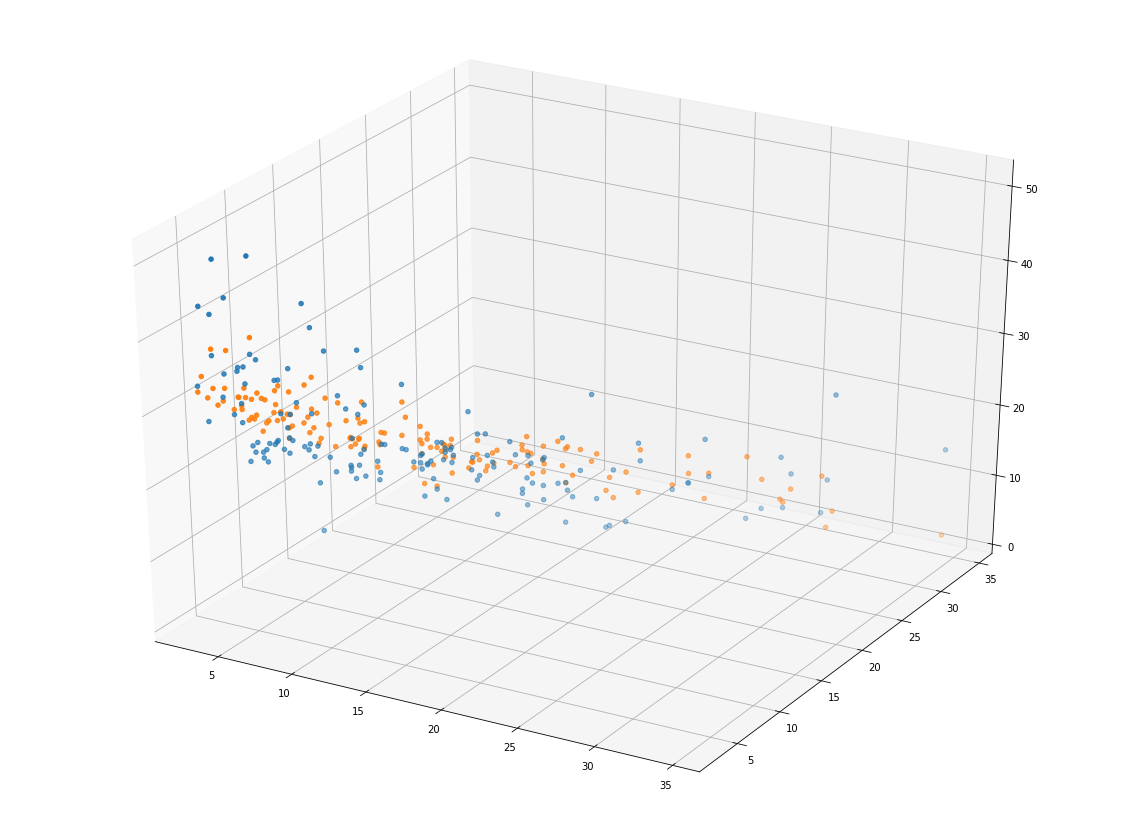

In [873]:
x_tensor = x_test_tensor.detach().numpy()
z = preds.detach().numpy()
z1 = y_test_tensor.detach().numpy()
z2 = preds.detach().numpy()
x = x_tensor[:,1]
y = x_tensor[:,1]

# plt.scatter(x,z)
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z1)
ax.scatter(x, y, z2)